In [1]:
import glob    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
sns.set_theme()
sns.set(font_scale=0.8)

from solardatatools import DataHandler
from solardatatools.solar_noon import energy_com
from solardatatools.signal_decompositions import l2_l1d1_l2d2p365 as cvx_sd # sum_squares version
from solardatatools.signal_decompositions_l2norm import l2_l1d1_l2d2p365 as cvx_sd_l2norm
from solardatatools.algorithms.time_shifts import TimeShift

In [2]:
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
%load_ext autoreload
%autoreload 2

In [ ]:
plot_heatmap(matrix='raw', flag='clear')
plot_heatmap(matrix='filled', flag='bad')

# Check current time shift analysis in DataHandler 
## (4 out of 7 datasets)

In [5]:
paths = ["./cassandra/timeshifts/*.csv"]

cassandra_data = {}
for path in paths:
    for fname in glob.glob(path):
        print(fname)
        df = pd.read_csv(fname)
        # data = df["meas_val_f"] # ac power
        dh = DataHandler(df, convert_to_ts=True)
        dh.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True, verbose=True)
        power_data_matrix = dh.filled_data_matrix
        dh.plot_time_shift_analysis_results()
        print(f"Timeshift: ", dh.time_shifts)
        
        if dh.time_shifts:
            cassandra_data[fname] = power_data_matrix

./cassandra/timeshifts/TABB01125140.csv
Fix time shift algorithm failed.
Error message: TimeShift.__init__() missing 1 required positional argument: 'l2norm'


total time: 5.92 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              2.71s
Cleaning                   0.17s
Filtering/Summarizing      3.04s
    Data quality           0.12s
    Clear day detect       0.28s
    Clipping detect        0.17s
    Capacity change detect 2.47s

Please run pipeline first.
Timeshift:  None
./cassandra/timeshifts/ZT163185000441C2053.csv


Traceback (most recent call last):
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 416, in run_pipeline
    self.auto_fix_time_shifts(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 956, in auto_fix_time_shifts
    self.time_shift_analysis = TimeShift()
TypeError: TimeShift.__init__() missing 1 required positional argument: 'l2norm'


Fix time shift algorithm failed.
Error message: TimeShift.__init__() missing 1 required positional argument: 'l2norm'




Traceback (most recent call last):
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 416, in run_pipeline
    self.auto_fix_time_shifts(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 956, in auto_fix_time_shifts
    self.time_shift_analysis = TimeShift()
TypeError: TimeShift.__init__() missing 1 required positional argument: 'l2norm'


total time: 8.44 seconds
--------------------------------
Breakdown
--------------------------------
Preprocessing              4.71s
Cleaning                   0.29s
Filtering/Summarizing      3.44s
    Data quality           0.18s
    Clear day detect       0.30s
    Clipping detect        0.18s
    Capacity change detect 2.78s

Please run pipeline first.
Timeshift:  None
./cassandra/timeshifts/TACIC1066981.csv
Solver interrupted
Sunrise/sunset detection failed.
Matrix filling failed.


Traceback (most recent call last):
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 270, in run_pipeline
    ss.run_optimizer(self.raw_data_matrix, plot=False, solver=solver)
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/algorithms/sunrise_sunset_estimation.py", line 232, in run_optimizer
    ss_smoothed = tl1_l2d2p365(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/signal_decompositions.py", line 215, in tl1_l2d2p365
    problem.solve(solver=solver, verbose=verbose)
  File "/Users/smiskov/opt/anaconda3/envs/pvi-env/lib/python3.10/site-packages/cvxpy/problems/problem.py", line 481, in solve
    return solve_func(self, *args, **kwargs)
  File "/Users/smiskov/opt/anaconda3/envs/pvi-env/lib/python3.10/site-packages/cvxpy/problems/problem.py", line 1016, in _solve
    solution = solving_chain.solve_via_data(
  File "/Users/smiskov/opt/anaconda3/envs/pvi-env/lib/python3.1

Clear day detection failed.


Traceback (most recent call last):
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 362, in run_pipeline
    self.detect_clear_days(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/data_handler.py", line 984, in detect_clear_days
    clear_days = find_clear_days(
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/clear_day_detection.py", line 46, in find_clear_days
    y = tl1_l2d2p365(tc, tau=0.9, c1=1e3, yearly_periodic=False, solver=solver)
  File "/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/solardatatools/signal_decompositions.py", line 204, in tl1_l2d2p365
    r = signal[use_ixs] - x[use_ixs]
  File "/Users/smiskov/opt/anaconda3/envs/pvi-env/lib/python3.10/site-packages/cvxpy/expressions/expression.py", line 717, in __array_ufunc__
    return ufunc_handler(self, args[0])
  File "/Users/smiskov/opt/anaconda3/envs/pvi-env/lib/python3.10/site-packages/cvxpy/

ValueError: Invalid dimensions (0,).

In [4]:
paths = ["./cassandra/timeshifts/*.csv"]

cassandra_data = {}
for path in paths:
    for fname in glob.glob(path):
        print(fname)
        df = pd.read_csv(fname)
        # data = df["meas_val_f"] # ac power
        dh = DataHandler(df, convert_to_ts=True)
        dh.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True, verbose=False)
        power_data_matrix = dh.filled_data_matrix
        dh.plot_time_shift_analysis_results()
        print(f"Timeshift: ", dh.time_shifts)
        
        if dh.time_shifts:
            cassandra_data[fname] = power_data_matrix

./cassandra/timeshifts/TABB01125140.csv
Please run pipeline first.
Timeshift:  None
./cassandra/timeshifts/ZT163185000441C2053.csv


KeyboardInterrupt: 

In [37]:
cassandra_data_list = ['./cassandra/timeshifts/TABB01125140.csv',
 './cassandra/timeshifts/TACIC1066981.csv',
 './cassandra/timeshifts/TADBC1077912.csv',
 './cassandra/timeshifts/TABGC1043585.csv']

In [38]:
paths = cassandra_data_list

cassandra_data = {}
for path in paths:
    for fname in glob.glob(path):
        print(fname)
        df = pd.read_csv(fname)
        # data = df["meas_val_f"] # ac power
        dh = DataHandler(df, convert_to_ts=True)
        dh.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=False, verbose=False)
        power_data_matrix = dh.filled_data_matrix
        print(f"Timeshift: ", dh.time_shifts)
        cassandra_data[fname] = power_data_matrix

./cassandra/timeshifts/TABB01125140.csv
Timeshift:  None
./cassandra/timeshifts/TACIC1066981.csv
Timeshift:  None
./cassandra/timeshifts/TADBC1077912.csv
Timeshift:  None
./cassandra/timeshifts/TABGC1043585.csv
Timeshift:  None


In [39]:
print(list(cassandra_data.keys()))

['./cassandra/timeshifts/TABB01125140.csv', './cassandra/timeshifts/TACIC1066981.csv', './cassandra/timeshifts/TADBC1077912.csv', './cassandra/timeshifts/TABGC1043585.csv']


# Need to add c1 optimization + iterative reweighting

TABB01125140
L2norm:  False


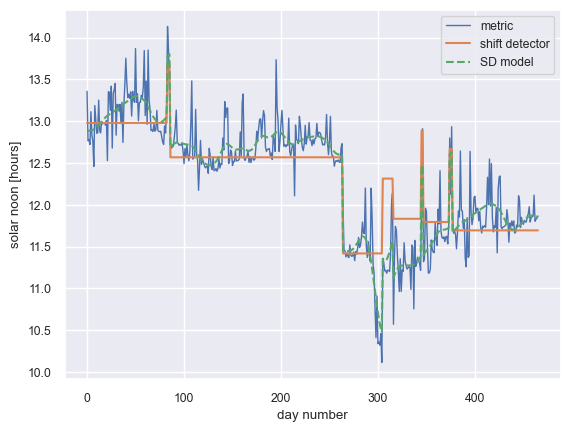

L2norm:  True


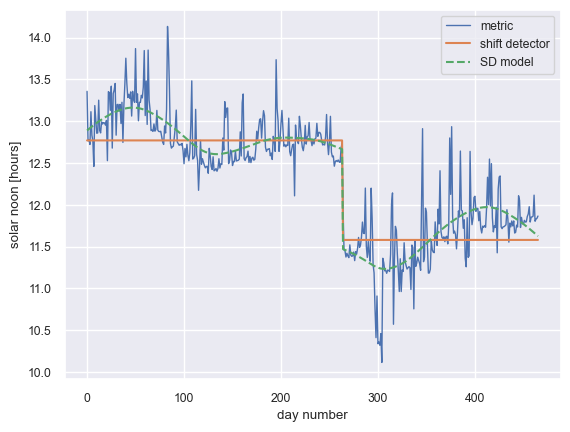

TACIC1066981
L2norm:  False


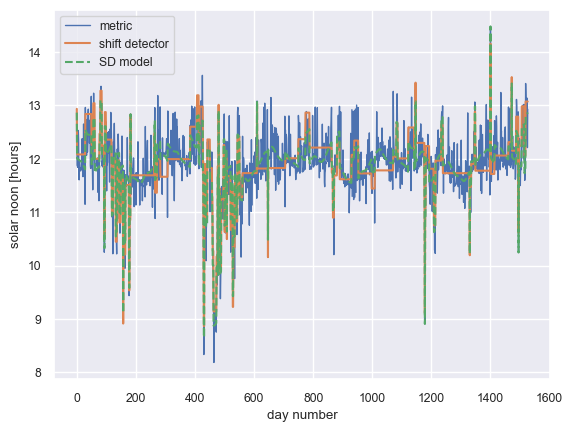

L2norm:  True


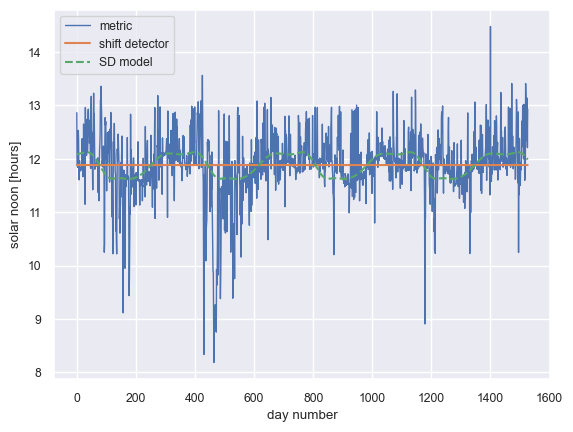

TADBC1077912
L2norm:  False


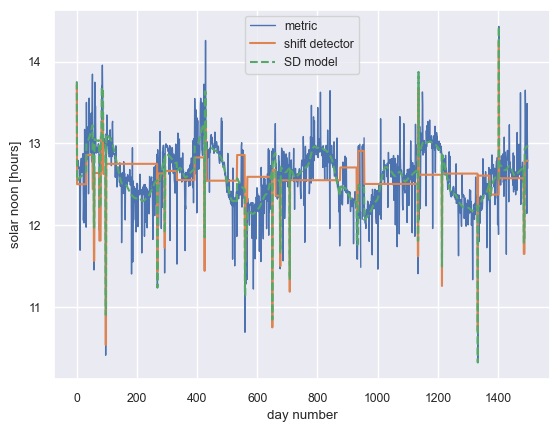

L2norm:  True


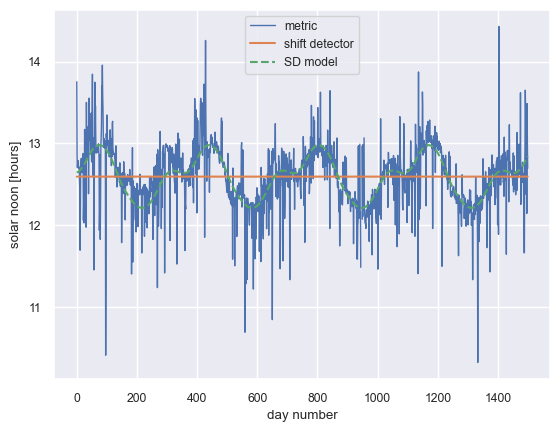

TABGC1043585
L2norm:  False


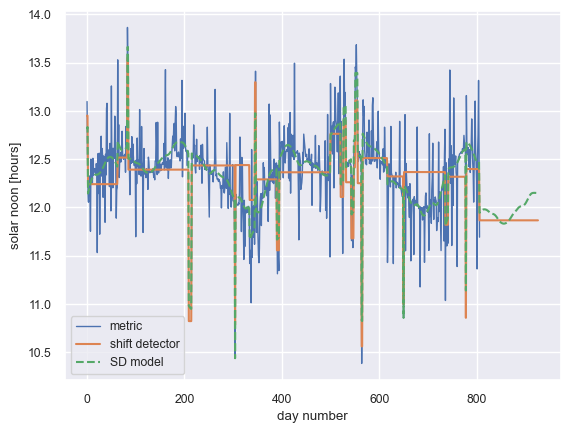

L2norm:  True


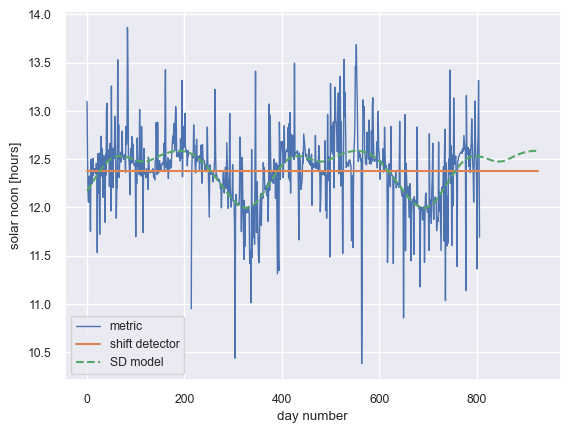

In [44]:
for fname in cassandra_data.keys():
    print(fname[23:-4])
    filled_data_matrix = cassandra_data[fname]

    # Sum Squares
    
    time_shift_analysis = TimeShift()
    time_shift_analysis.l2norm = False 
    time_shift_analysis.run(
        filled_data_matrix,
        #use_ixs=use_ixs,
        c1=5,
        c2=500,
        solar_noon_estimator="com",
        threshold=0.1,
        periodic_detector=False,
        solver="MOSEK",
    )
    print("L2norm: ", time_shift_analysis.l2norm)
    time_shift_analysis.plot_analysis()
    plt.show()
    
    # L2 norm

    time_shift_analysis_l2 = TimeShift()
    time_shift_analysis_l2.l2norm = True
    time_shift_analysis_l2.run(
        filled_data_matrix,
        #use_ixs=use_ixs,
        c1=5,
        c2=500,
        solar_noon_estimator="com",
        threshold=0.1,
        periodic_detector=False,
        solver="MOSEK"
    )
    print("L2norm: ", time_shift_analysis_l2.l2norm)
    time_shift_analysis_l2.plot_analysis()
    plt.show()

In [40]:
results = {}

In [62]:
l2norm_s1 = {}
l2norm_s2 = {}

for fname in cassandra_data.keys():
    filled_data_matrix = cassandra_data[fname]
    
    # get original fit
    time_shift_analysis_l2 = TimeShift()
    time_shift_analysis_l2.l2norm = True
    time_shift_analysis_l2.run(
        filled_data_matrix,
        #use_ixs=use_ixs,
        c1=5,
        c2=500,
        solar_noon_estimator="com",
        threshold=0.1,
        periodic_detector=False,
        solver="MOSEK"
    )
    l2norm_s1[fname] = time_shift_analysis_l2.s1
    l2norm_s2[fname] = time_shift_analysis_l2.s2

In [51]:
np.log10(20)

1.3010299956639813

In [57]:
results_s2 = {}

In [61]:
results_s2_c2 = {}

In [63]:
weight_iter = np.logspace(1, 4, 200) # original c2=500

def run(sig):
    mae_list = []
    
    filled_data_matrix = sig
    for w in tqdm(weight_iter):
        time_shift_analysis = TimeShift()
        time_shift_analysis.l2norm = False
        time_shift_analysis.run(
            filled_data_matrix,
            #use_ixs=use_ixs,
            c1=5,
            c2=w,
            solar_noon_estimator="com",
            threshold=0.1,
            periodic_detector=False,
            solver="MOSEK",
        )

        mae_list.append(mae(time_shift_analysis.s2, l2norm_s2[fname]))
        
    return weight_iter[np.argmin(mae_list)], np.min(mae_list), mae_list

In [58]:
# weight_iter_s2 = np.logspace(1.3, 3.3, 100) # original c2=500

# def run(sig):
#     mae_list = []
    
#     filled_data_matrix = sig
#     for w in tqdm(weight_iter_s2):
#         time_shift_analysis = TimeShift()
#         time_shift_analysis.l2norm = False
#         time_shift_analysis.run(
#             filled_data_matrix,
#             #use_ixs=use_ixs,
#             c1=w,
#             c2=results[f"{fname}_weight_min"],
#             solar_noon_estimator="com",
#             threshold=0.1,
#             periodic_detector=False,
#             solver="MOSEK",
#         )

#         mae_list.append(mae(time_shift_analysis.s1, l2norm_s1[fname]))
        
#     return weight_iter[np.argmin(mae_list)], np.min(mae_list), mae_list

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [02:21<00:00,  1.41it/s]


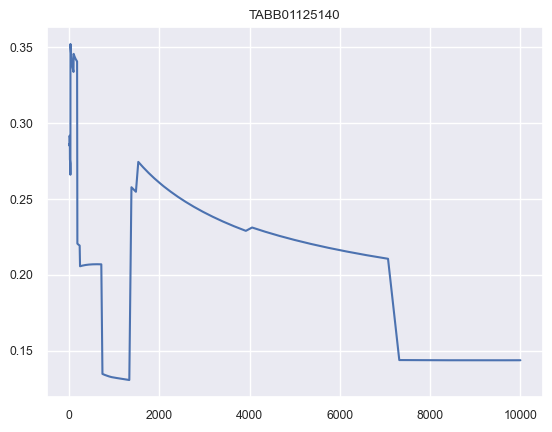

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [05:12<00:00,  1.56s/it]


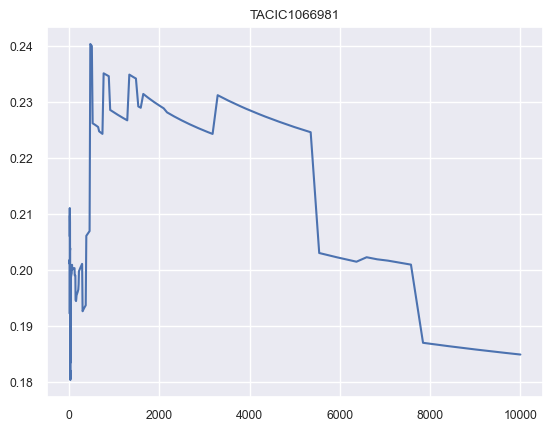

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [04:26<00:00,  1.33s/it]


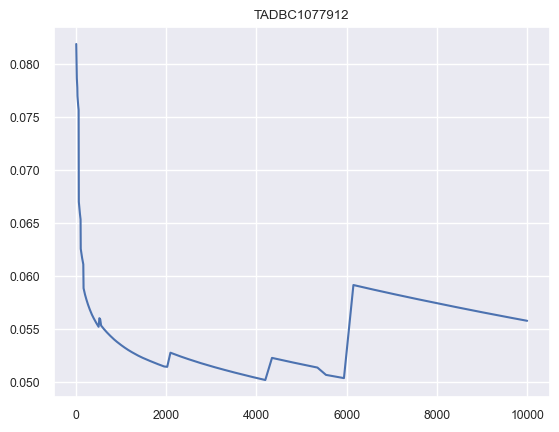

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [03:13<00:00,  1.03it/s]


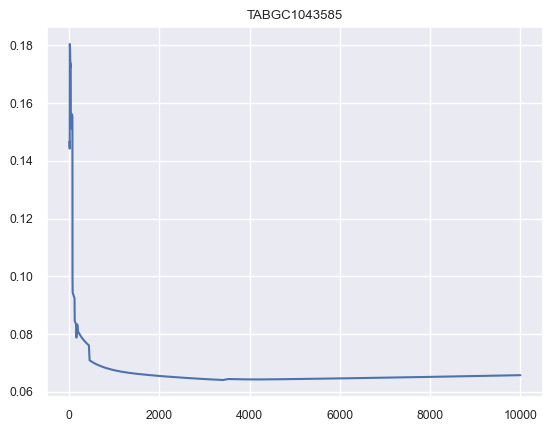

In [64]:
for fname in cassandra_data.keys():
    r = run(cassandra_data[fname])
    results_s2_c2[f"{fname}_weight_min"] =  r[0]
    results_s2_c2[f"{fname}_mae_min"] = r[1]
    results_s2_c2[f"{fname}_mae_list"] = r[2]
    plt.plot(weight_iter, results_s2_c2[f"{fname}_mae_list"])
    plt.title(fname[23:-4])
    plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:49<00:00,  2.03it/s]


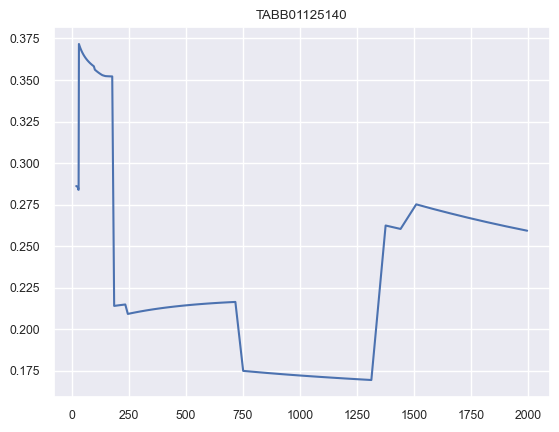

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:50<00:00,  1.10s/it]


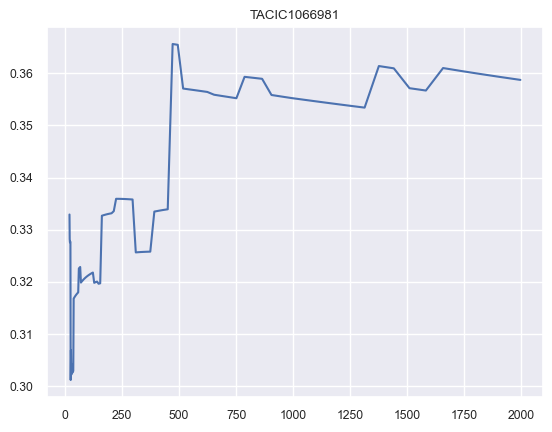

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:32<00:00,  1.08it/s]


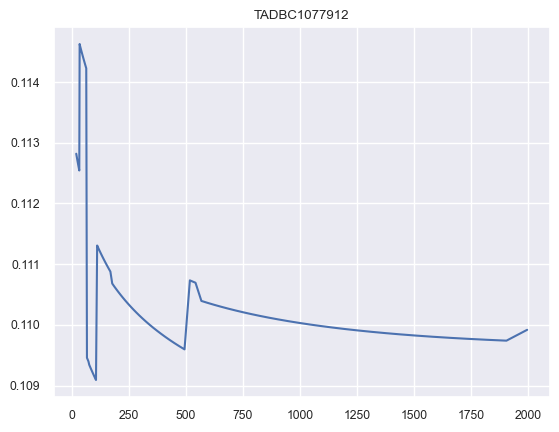

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [01:06<00:00,  1.51it/s]


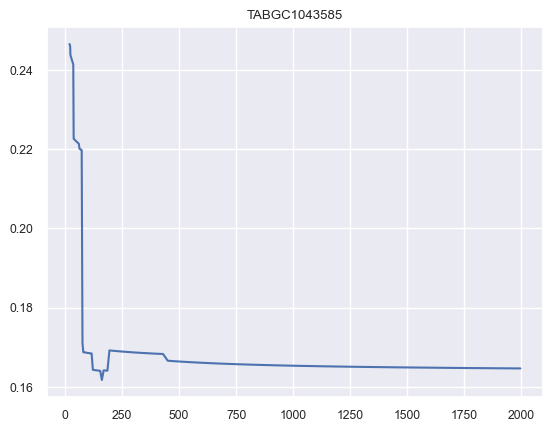

In [53]:
for fname in cassandra_data.keys():
    r = run(cassandra_data[fname])
    results[f"{fname}_weight_min"] =  r[0]
    results[f"{fname}_mae_min"] = r[1]
    results[f"{fname}_mae_list"] = r[2]
    plt.plot(weight_iter, results[f"{fname}_mae_list"])
    plt.title(fname[23:-4])
    plt.show()

In [55]:
for fname in cassandra_data.keys():
    print(fname[23:-4], f'{results[f"{fname}_weight_min"]:.2f}')

TABB01125140 1312.75
TACIC1066981 25.18
TADBC1077912 106.48
TABGC1043585 161.84


In [65]:
paths = ["./cassandra/timeshifts/*.csv"]

# cassandra_data = {}
# for path in paths:
#     for fname in glob.glob(path):
#         print(fname)
#         df = pd.read_csv(fname)
#         # data = df["meas_val_f"] # ac power
#         dh = DataHandler(df, convert_to_ts=True)
#         dh.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True, verbose=False)
#         power_data_matrix = dh.filled_data_matrix
#         print(f"Timeshift: ", dh.time_shifts)
        
#         if dh.time_shifts:
#             cassandra_data[fname] = power_data_matrix

# Trying to reproduce pipeline w/ access to SD weights

In [79]:
paths = ["./cassandra/timeshifts/*.csv"]

cassandra_data = {}
for path in paths:
    for fname in glob.glob(path):
        print(fname[23:-4])

        df = pd.read_csv(fname)

        dh = DataHandler(df, convert_to_ts=True)
        dh.l2norm = True 
        dh.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True, verbose=False, c1=50, c2=50)
        print("DH auto fix_shifts")
        plt.show()

        ####
        dh = DataHandler(df, convert_to_ts=True)
        dh.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=False, verbose=False)
        dh.l2norm = True 
        filled_data_matrix = dh.filled_data_matrix

        dh.auto_fix_time_shifts(
        c1=5,
        c2=500,
        estimator="srss",
        threshold=0.1,
        periodic_detector=True,
        solver="MOSEK"
    )
        print("L2norm DH")
        plt.show()


        #####

        time_shift_analysis_l2 = TimeShift()
        time_shift_analysis_l2.l2norm = True
        time_shift_analysis_l2.run(
            filled_data_matrix,
            #use_ixs=use_ixs,
            c1=5,
            c2=500,
            solar_noon_estimator="srss",
            threshold=0.1,
            periodic_detector=True,
            solver="MOSEK"
        )
        print("L2norm through TS Class: ", time_shift_analysis_l2.l2norm)
        time_shift_analysis_l2.plot_analysis()
        plt.show()
    

TABB01125140
50 50
DH auto fix_shifts
Solver interrupted


ValueError: OSQP solve error!

# =================

TABB01125140
L2norm:  False


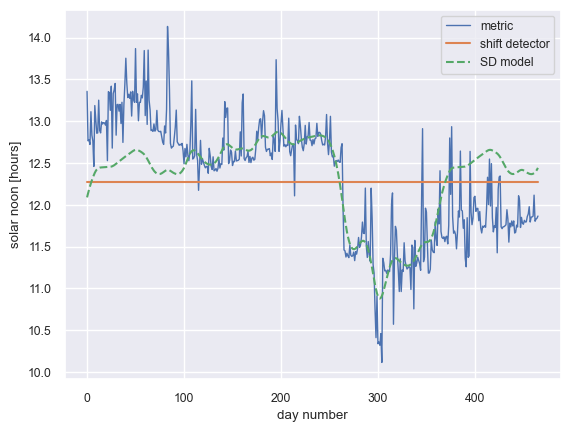

L2norm:  True


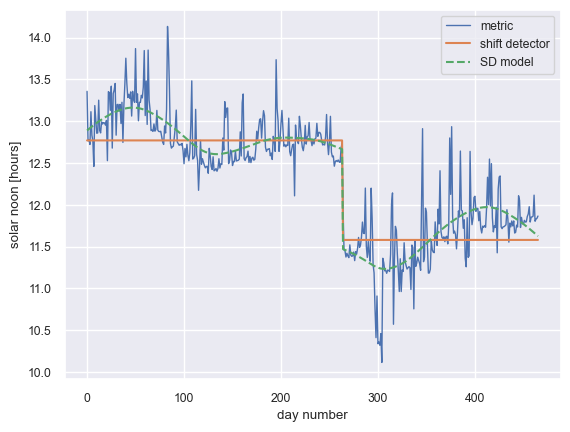

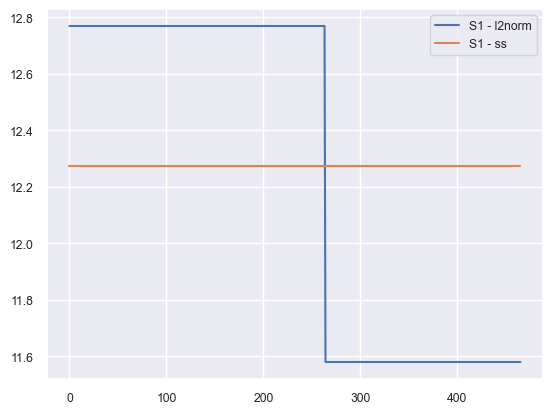

TACIC1066981
L2norm:  False


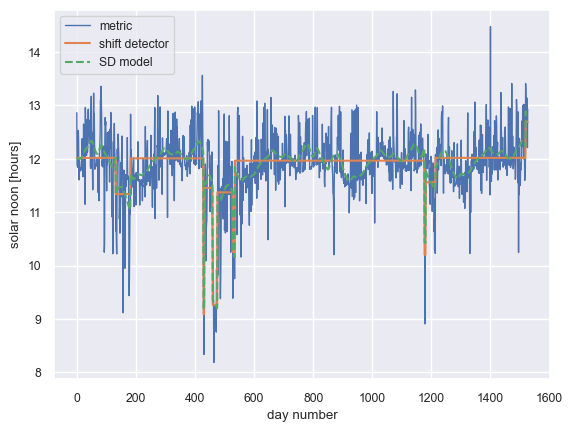

L2norm:  True


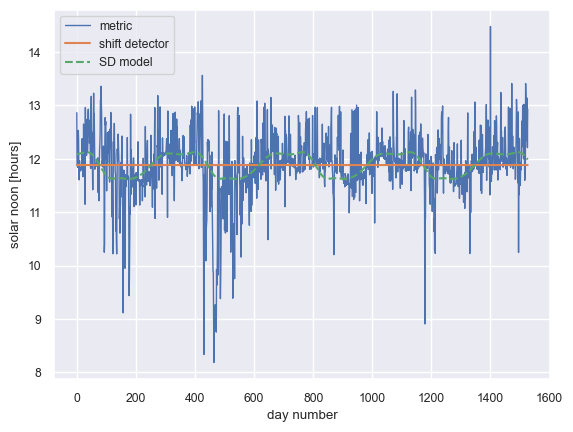

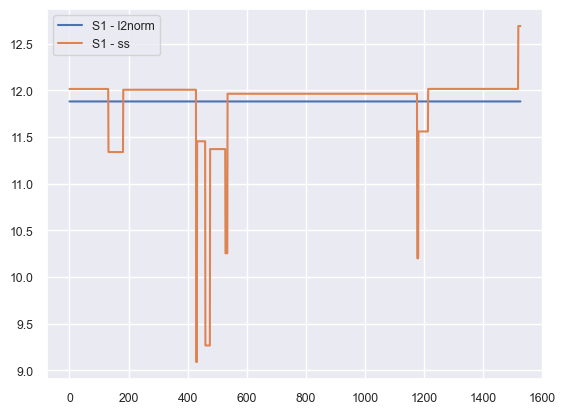

TADBC1077912
L2norm:  False


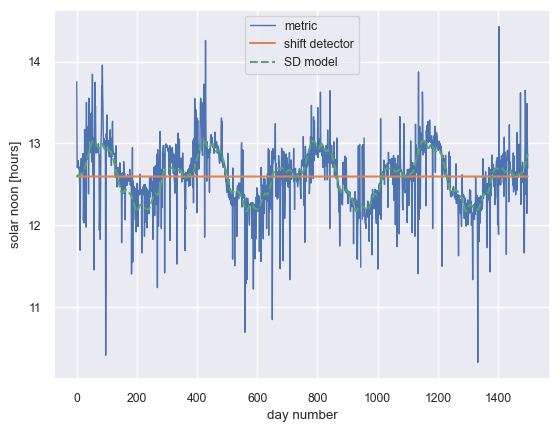

L2norm:  True


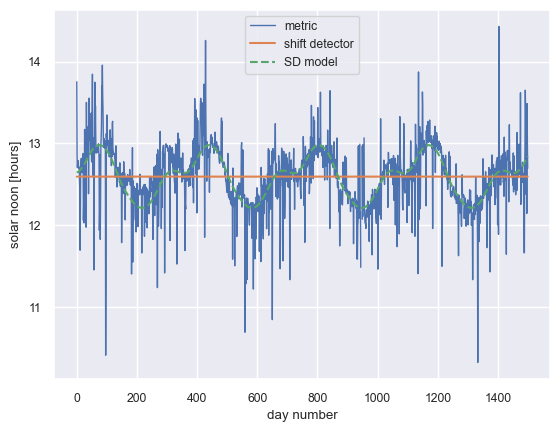

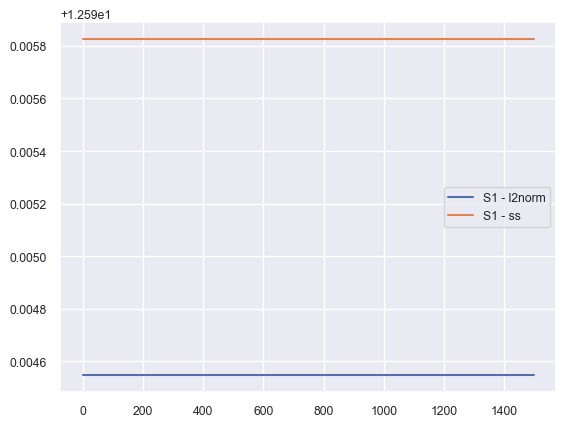

TABGC1043585
L2norm:  False


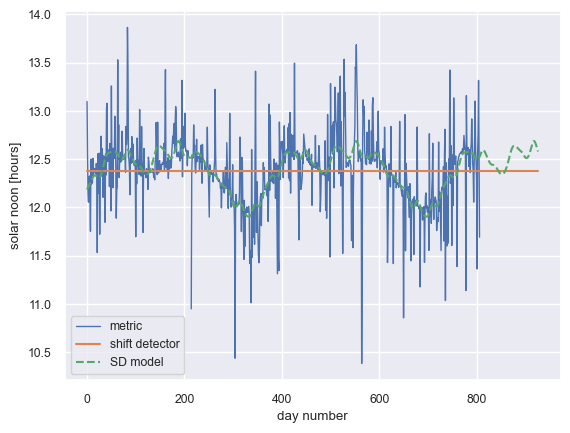

L2norm:  True


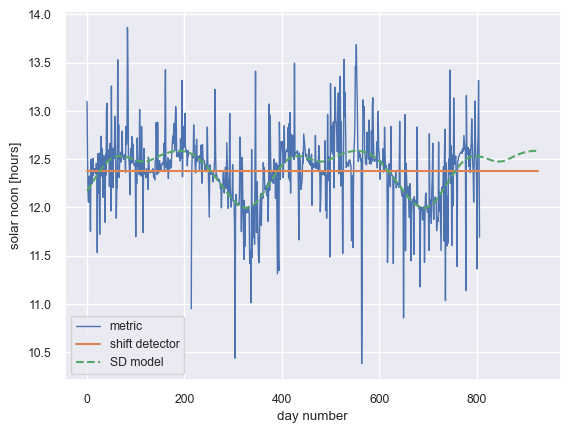

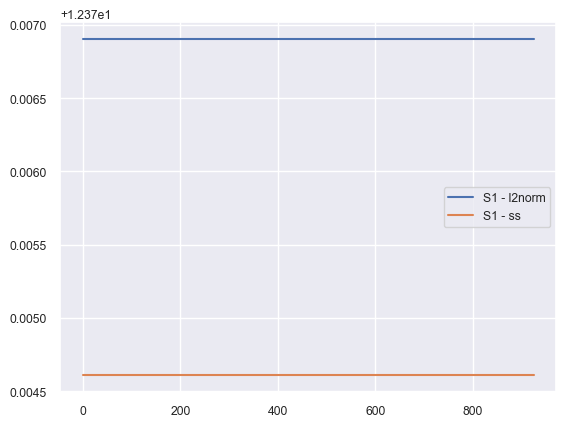

In [60]:
for fname in cassandra_data.keys():
    print(fname[23:-4])
    filled_data_matrix = cassandra_data[fname]

    # Sum squares at best weight
    time_shift_analysis = TimeShift()
    time_shift_analysis.l2norm = False
    time_shift_analysis.run(
        filled_data_matrix,
        #use_ixs=use_ixs,
        c1=results[f"{fname}_weight_min"],
        c2=250,
        solar_noon_estimator="com",
        threshold=0.1,
        periodic_detector=False,
        solver="MOSEK",
    )
    print("L2norm: ", time_shift_analysis.l2norm)
    time_shift_analysis.plot_analysis()
    plt.show()

    time_shift_analysis_l2 = TimeShift()
    time_shift_analysis_l2.l2norm = True
    time_shift_analysis_l2.run(
        filled_data_matrix,
        #use_ixs=use_ixs,
        c1=5,
        c2=500,
        solar_noon_estimator="com",
        threshold=0.1,
        periodic_detector=False,
        solver="MOSEK"
    )
    print("L2norm: ", time_shift_analysis_l2.l2norm)
    time_shift_analysis_l2.plot_analysis()
    plt.show()
    
    fig = plt.figure()
    plt.plot(time_shift_analysis_l2.s1, label="S1 - l2norm")
    plt.plot(time_shift_analysis.s1, label="S1 - ss")
    plt.legend()
    plt.show()

- how close are these to DH version? 
- take median of weights and check if still ok
- check w/ smaller/larger datasets?

In [92]:
ts_paths = ['./cassandra/timeshifts/TABB01125140.csv',
'./cassandra/timeshifts/TACIC1066981.csv',
'./cassandra/timeshifts/TADBC1077912.csv', 
'./cassandra/timeshifts/TABGC1043585.csv']


for fname in ts_paths:

    print(fname[23:-4])

    df = pd.read_csv(fname)
    dh = DataHandler(df, convert_to_ts=True)
    dh.l2norm = True 
    print("SS version")
    dh.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True, verbose=False, c1=5, c2=500)
    plt.show()

    # dh2 = DataHandler(df, convert_to_ts=True)
    # dh2.l2norm = True 
    # print("L2norm version")
    # dh2.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True, verbose=False, c1=5, c2=500)
    # plt.show()
    


TABB01125140
SS version
TACIC1066981
SS version
Solver interrupted


ValueError: Invalid dimensions (0,).

In [4]:
ts_paths = ['./cassandra/timeshifts/TABB01125140.csv',
'./cassandra/timeshifts/TACIC1066981.csv',
'./cassandra/timeshifts/TADBC1077912.csv', 
'./cassandra/timeshifts/TABGC1043585.csv']


for fname in ts_paths:

    print(fname[23:-4])

    df = pd.read_csv(fname)
    dh = DataHandler(df, convert_to_ts=True)
    dh.l2norm = True 
    print("SS version")
    dh.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True, verbose=False, c1=5, c2=500)
    dh.plot_time_shift_analysis_results()

    dh2 = DataHandler(df, convert_to_ts=True)
    dh2.l2norm = True 
    print("L2norm version")
    dh2.run_pipeline(power_col=dh.keys[0][-1], fix_shifts=True, verbose=False, c1=5, c2=500)
    dh2.plot_time_shift_analysis_results()
    


TABB01125140
SS version
Please run pipeline first.
L2norm version
Please run pipeline first.
TACIC1066981
SS version
Solver interrupted


ValueError: Invalid dimensions (0,).